**Clustering Geospatial Data with interactive Maps**

**Store Rationalization** is the reorganization of a company in order to increase its operating efficiency and decrease costs. 

**Clustering** is the task of grouping a set of objects in such a way that observations in the same group are more similar to each other than to those in other groups.

**Geospatial analysis** is the field of Data Science that processes satellite images, GPS coordinates, and street addresses to apply to geographic models.

The purpose of this project is ti use clustering with geographic data to solve a retail rationalization problem. 

the **Starbucks Stores dataset** provides the location of all the stores in operation.

### PACKAGES

In [1]:
# data
import numpy as np
import pandas as pd
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
# geospatial
import folium
import geopy
# ML and DL
from sklearn import preprocessing, cluster
import scipy
import minisom

### DATA READING 

In [32]:
dtf = pd.read_csv('data/starbucks.csv')

In [5]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


In [6]:
display(dtf)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,Starbucks,21401-212072,Rex,Licensed,"141 Nguyễn Huệ, Quận 1, Góc đường Pasteur và L...",Thành Phố Hồ Chí Minh,SG,VN,70000,08 3824 4668,GMT+000000 Asia/Saigon,106.70,10.78
25596,Starbucks,24010-226985,Panorama,Licensed,"SN-44, Tòa Nhà Panorama, 208 Trần Văn Trà, Quận 7",Thành Phố Hồ Chí Minh,SG,VN,70000,08 5413 8292,GMT+000000 Asia/Saigon,106.71,10.72
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,"Cnr Tyrwhitt and Cradock Avenue, Rosebank",Johannesburg,GT,ZA,2194,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,"Shop 61B, Central Square, Cnr Aramist & Coroba...",Menlyn,GT,ZA,181,NaN,GMT+000000 Africa/Johannesburg,28.28,-25.79


### DATA EXPLORATION 

Text(0.5, 1.0, '')

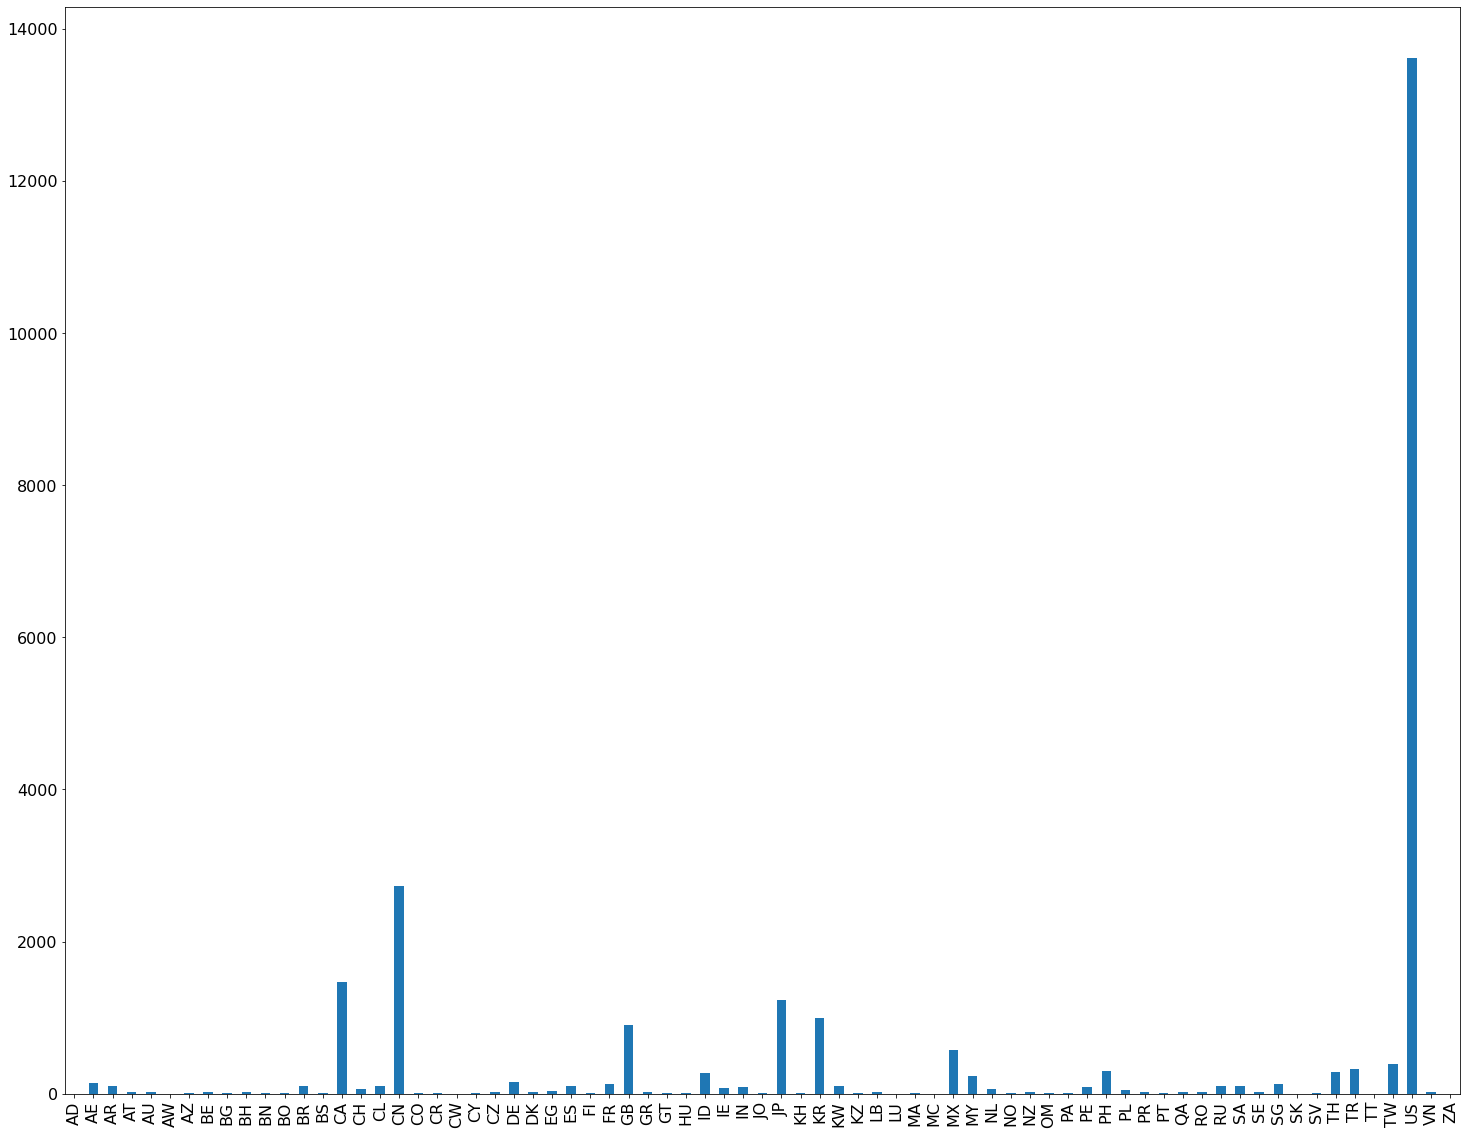

In [7]:
#Barplot of country column
plt.figure(figsize = (25,20))
dtf.groupby(['Country']).size().plot(kind="bar",fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.title('')

we're going to use the state with more store, NY, US

In [33]:
filter = "New York"
dtf = dtf[dtf["City"]==filter][["City","Street Address","Longitude","Latitude"]].reset_index(drop=True)
dtf = dtf.reset_index().rename(columns={"index":"id"})

In [8]:
display(dtf)

,id,City,Street Address,Longitude,Latitude
0,0,New York,245 East 80th St,-73.95,40.77
1,1,New York,130 Fulton Street,-74.01,40.71
2,2,New York,"825 Eighth Avenue, W-9",-73.99,40.76
3,3,New York,"150 Varick Street, The Lyric Building",-74.01,40.73
4,4,New York,2521 Broadway,-73.97,40.79
...,...,...,...,...,...
227,227,New York,77-83 West 125th Street,-73.95,40.81
228,228,New York,1740 Broadway,-73.98,40.77
229,229,New York,325 W 49th St,-73.99,40.76
230,230,New York,684 Avenue of the Americas,-73.99,40.74


In order to proceed with the business case, we're going to simulate some information for each store:

- **Potential**: total capacity in terms of staff (e.g. 10 means that the store can have up to 10 employees)
- **Staff**: current staff level (e.g. 7 means that the store is currently operating with 7 employees)
- **Capacity**: current left capacity (e.g. 10–7=3, the store can still host 3 employees)
- **Cost**: annual cost for the company to keep the store operating (“low”, “medium”, “high”)

In [34]:
dtf["Potential"] = np.random.randint(low=3, high=10+1, size=len(dtf))
dtf["Staff"] = dtf["Potential"].apply(lambda x: int(np.random.rand()*x)+1)
dtf["Capacity"] = dtf["Potential"] - dtf["Staff"]
dtf["Cost"] = np.random.choice(["high","medium","low"], size=len(dtf), p=[0.4,0.5,0.1])

In [12]:
display(dtf)

,id,City,Street Address,Longitude,Latitude,Potential,Staff,Capacity,Cost
0,0,New York,245 East 80th St,-73.95,40.77,7,7,0,high
1,1,New York,130 Fulton Street,-74.01,40.71,5,4,1,high
2,2,New York,"825 Eighth Avenue, W-9",-73.99,40.76,10,6,4,low
3,3,New York,"150 Varick Street, The Lyric Building",-74.01,40.73,9,4,5,medium
4,4,New York,2521 Broadway,-73.97,40.79,9,3,6,medium
...,...,...,...,...,...,...,...,...,...
227,227,New York,77-83 West 125th Street,-73.95,40.81,9,5,4,medium
228,228,New York,1740 Broadway,-73.98,40.77,8,2,6,medium
229,229,New York,325 W 49th St,-73.99,40.76,6,2,4,high
230,230,New York,684 Avenue of the Americas,-73.99,40.74,5,1,4,medium


### DATA ANALYSIS 

#### The costs distribution

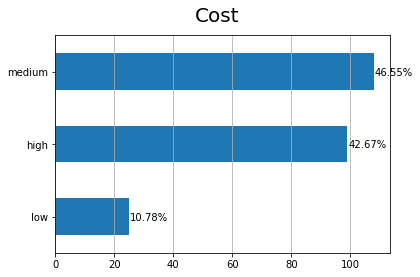

In [48]:
x = "Cost"
ax = dtf[x].value_counts().sort_values().plot(kind="barh")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show()

#### The capacity distribution

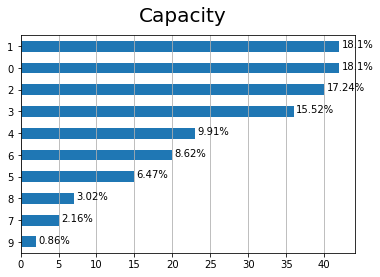

In [49]:
x = "Capacity"
ax = dtf[x].value_counts().sort_values().plot(kind="barh")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show()

Only a small part of stores are running at full potential (left Capacity = 0), 
meaning that there are some with really low staff (high left Capacity).

### VISUALIZATION

In [37]:
country = "New York"
## get location using geopy
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(country)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

City of New York, New York, United States
[lat, long]: [40.7127281, -74.0060152]


we're going to create the map with folium, a package that allows us to plot interactive maps without needing to load a shapefile. 
Each store shall be identified by a point with size proportional to its current staff and color based on its cost.

In [38]:
x, y = "Latitude", "Longitude"
color = "Cost"
size = "Staff"
popup = "Street Address"
data = dtf.copy()

# create color column
lst_colors=["red","green","orange"]
lst_elements = sorted(list(dtf[color].unique()))
data["color"] = data[color].apply(lambda x:lst_colors[lst_elements.index(x)])

# create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(data[size].values.reshape(-1,1)).reshape(-1)

# initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",zoom_start=12)

# add points
data.apply(lambda row: folium.CircleMarker(location=[row[x],row[y]], popup=row[popup],
                                           color=row["color"], fill=True,
                                           radius=row["size"]).add_to(map_), axis=1)

## plot the map
map_

Cost:
- **Red**: high
- **orange**: medium
- **green**: low

Zoom in to a specific area and click on a circle to have more information about a store.

*The objective is to close as many high-cost stores (red points) as possible by moving their staff into low-cost stores (green points) with capacity located in the same neighborhood. As a result, we’ll **maximize profit**, by closing high-cost stores, and **efficiency**, by having low-cost stores working at full capacity.*



### CLUSTERING
Main algorithms used are: **K-Means** and **Self Organizing Map**.

#### K-Means

K-Means aims to partition the observations into a predefined number of clusters (k) in which each point belongs to the cluster with the nearest mean.

In order to define the right k, we're going to use the **Elbow Method**: plotting the variance as a function of the number of clusters and picking the k that flats the curve.

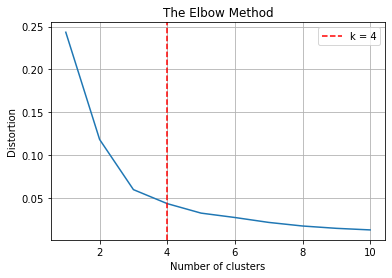

In [39]:
X = dtf[["Latitude","Longitude"]]
max_k = 10

## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)

## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i in np.diff(distortions,2)]))

## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters',ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [40]:
k = 4
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = dtf[["Latitude","Longitude"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)

## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_,dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:dtf_X["centroids"].iloc[i] = 1

## add clustering info to the original dataset
dtf[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
dtf.sample(5)

/Users/saralayachi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,id,City,Street Address,Longitude,Latitude,Potential,Staff,Capacity,Cost,cluster,centroids
158,158,New York,731 Lexington Avenue,-73.97,40.76,3,3,0,high,3,0
119,119,New York,219 First Avenue,-73.98,40.73,4,1,3,high,1,0
96,96,New York,14 W. 23rd St,-73.99,40.74,10,3,7,medium,1,0
63,63,New York,45 West 4th Street,-74.00,40.73,7,6,1,high,0,0
64,64,New York,1 Penn Plaza Concourse Level,-73.99,40.75,3,2,1,medium,1,0


Tow columns are added to the dataset: “cluster” indicating what cluster the observation belongs to, and “centroids” that is 1 if an observation is also the centroid (the closest to the center) and 0 otherwise. 

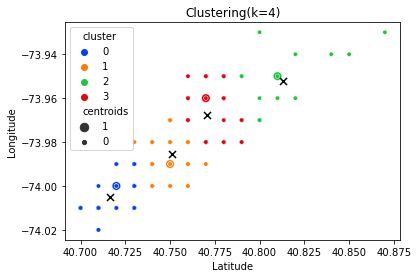

In [41]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="Latitude", y="Longitude", data=dtf, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering(k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black',marker="x")

#### Self Organizing Maps (SOMs)

A SOM is a type of artificial neural network that is trained using unsupervised learning to produce a low-dimensional representation of the input space, called a “map” (also referred to as Kohonen layer). Basically, inputs are connected to n x m neurons which form the map, then for every observation is calculated the “winning” neuron (the closest), and neurons are clustered together using the lateral distance. 

Here, we're going try with a 4x4 SOM:

Text(0.5, 1.0, 'Clustering (k=4)')

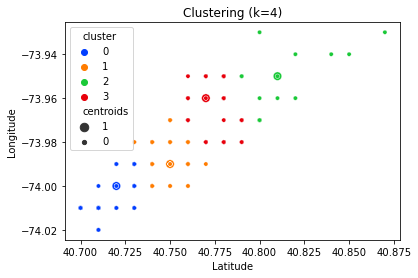

In [42]:
X = dtf[["Latitude","Longitude"]]
map_shape = (4,4)

## scale data
scaler = preprocessing.StandardScaler()
X_preprocessed = scaler.fit_transform(X.values)

## clustering
model = minisom.MiniSom(x=map_shape[0], y=map_shape[1],input_len=X.shape[1])
model.train_batch(X_preprocessed, num_iteration=100, verbose=False)

## build output dataframe
dtf_X = X.copy()
# each neuron represents a cluster
# with np.ravel_multi_index we convert the bidimensional coordinates to a monodimensional index
dtf_X["cluster"] = np.ravel_multi_index(np.array([model.winner(x) for x in X_preprocessed]).T, dims=map_shape)



## plot
k = dtf["cluster"].nunique()
fig, ax = plt.subplots()
sns.scatterplot(x="Latitude", y="Longitude", data=dtf, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')



In [43]:
x, y = "Latitude", "Longitude"
color = "cluster"
size = "Staff"
popup = "Street Address"
marker = "centroids"
data = dtf.copy()

## create color column
lst_elements = sorted(list(dtf[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in range(len(lst_elements))]
data["color"] = data[color].apply(lambda x:lst_colors[lst_elements.index(x)])

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron", zoom_start=12)

## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)


## plot the map
map_

### STORE RATIONALIZATION

Inside each cluster, it will selected the potential targets (high-cost stores) and hubs (low-cost stores), and relocate the staff of the targets in the hubs until the latter reach full capacity. When the whole staff of a target is moved, the store can be closed.

In [44]:
dtf_new = pd.DataFrame()
for c in sorted(dtf["cluster"].unique()):
    dtf_cluster = dtf[dtf["cluster"]==c]
    
    ## hubs and targets
    lst_hubs = dtf_cluster[dtf_cluster["Cost"]=="low"].sort_values("Capacity").to_dict("records")
    lst_targets = dtf_cluster[dtf_cluster["Cost"]=="high"].sort_values("Staff").to_dict("records")
    
    ## move targets
    for target in lst_targets:
         for hub in lst_hubs:
             ### if hub has space
             if hub["Capacity"] > 0:
                residuals = hub["Capacity"] - target["Staff"]
                #### case of hub has still capacity: do next target
                if residuals >= 0:
                   hub["Staff"] += target["Staff"]
                   hub["Capacity"] = hub["Potential"] - hub["Staff"]
                   target["Capacity"] = target["Potential"]
                   target["Staff"] = 0
                   break
                #### case of hub is full: do next hub
                else:
                   hub["Capacity"] = 0
                   hub["Staff"] = hub["Potential"]
                   target["Staff"] = -residuals
                   target["Capacity"] = target["Potential"] - target["Staff"]
    dtf_new = dtf_new.append(pd.DataFrame(lst_hubs)).append(pd.DataFrame(lst_targets))

dtf_new = dtf_new.append(dtf[dtf["Cost"]=="medium"]).reset_index(drop=True).sort_values(["cluster","Staff"])
dtf_new.head()

,id,City,Street Address,Longitude,Latitude,Potential,Staff,Capacity,Cost,cluster,centroids
8,175,New York,518 Hudson Street,-74.01,40.73,5,0,5,high,0,0
9,52,New York,120 Church Street,-74.01,40.71,3,0,3,high,0,0
10,53,New York,100 William Street,-74.01,40.71,5,0,5,high,0,0
11,61,New York,482 West Broadway,-74.00,40.73,4,0,4,high,0,0
12,95,New York,60 Wall St,-74.01,40.71,4,0,4,high,0,0


In [45]:
dtf_new["closed"] = dtf_new["Staff"].apply(lambda x: 1 if x==0 else 0)
print("closed:", dtf_new["closed"].sum())

closed: 40


In [46]:
x, y = "Latitude", "Longitude"
color = "Cost"
size = "Staff"
popup = "Street Address"
data = dtf_new.copy()

# create color column
lst_colors=["red","green","orange"]
lst_elements = sorted(list(dtf[color].unique()))
data["color"] = data[color].apply(lambda x:lst_colors[lst_elements.index(x)])

# create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(data[size].values.reshape(-1,1)).reshape(-1)

# initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",zoom_start=12)

# add points
data.apply(lambda row: folium.CircleMarker(location=[row[x],row[y]], popup=row[popup],
                                           color=row["color"], fill=True,
                                           radius=row["size"]).add_to(map_), axis=1)

## plot the map
map_

#### Conclusion

So including geospatial data  with business data we solved a rationalization problem in simple and effective way.
The analysis was made with simulated data. Instead, including true data and more variables we could get very interesting insights. 

Here we used a country, but it can be implemented for another country or a specific city.

-

#### References

https://www.kaggle.com/datasets/starbucks/store-locations

https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

https://medium.com/machine-learning-researcher/self-organizing-map-som-c296561e2117

https://towardsdatascience.com/clustering-geospatial-data-f0584f0b04ec

https://github.com/JustGlowing/minisom/blob/master/examples/Clustering.ipynb